In [ ]:
#@title ## Big Data Lab  - Assignment 2 - Dataframe manipulation with Pandas
#@markdown ### Instructions
#@markdown 1. The purpose of this assignment is to cover the necessary pandas library operations 
#@markdown  you need to dominate in order to handle the course material.
#@markdown 2. Please complete the assignment on your own. You are welcome to discuss your work with your fellow students but to maintain a healthy learning process - please keep all final answers to yourself! 
#@markdown 3. Complete the answers in the empty cells - Feel free to add as many extra cell as you require.
#@markdown 4. Fill in your name and select the Year and Department.
#@markdown 5. When done - Download the colab notebook by going to 'File -> Download .ipynb' and submit the file in the course's moodle page before the due date. 
 
#@markdown ---
#@markdown ### Enter your information:
Full_Name = "" #@param {type:"string"}
Depatment = "Computer Science" #@param ["Select","Computer Science", "Industrial Engineering", "Economics and Management"]
Year = "Second" #@param ["Select","Second", "Third", "Fourth"]

#@markdown ---


1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

2. Create a dataframe from the following link. Name it "diamonds_df".
>'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv'

In [ ]:
daimods_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

##Know your data
Here is a summary of the dataframe features.


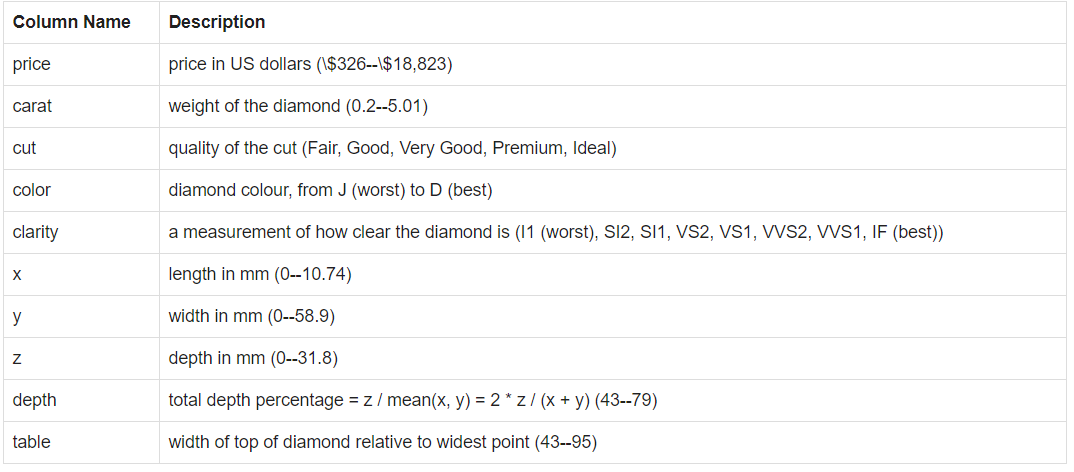

3. Print the head and info of the dataframe

In [ ]:
daimods_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
daimods_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


4. What is the dataframe's shape?

In [ ]:
n_rows, n_cols = daimods_df.shape
print("daimods dataframe contains "+str(n_rows)+" rows and %d columns."%(n_cols))

daimods dataframe contains 53940 rows and 10 columns.


5. What is the datatype of the 'price' feature? Change it to float64 in the original dataframe

In [ ]:
daimods_df['price'].dtype

dtype('int64')

In [ ]:
daimods_df = daimods_df.astype({'price':'float64'})
daimods_df['price'].dtype

dtype('float64')

6. Replace the three x,y,z features with a single feature named 'volume'. The value of each case(row) should be the product x*y*z.



In [ ]:
daimods_df["volume"] = daimods_df["x"] * daimods_df["y"] * daimods_df["z"]
daimods_df.drop(['x','y','z'], axis='columns').head(10)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326.0,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327.0,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334.0,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335.0,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336.0,38.693952
6,0.24,Very Good,I,VVS1,62.3,57.0,336.0,38.830870
7,0.26,Very Good,H,SI1,61.9,55.0,337.0,42.321081
8,0.22,Fair,E,VS2,65.1,61.0,337.0,36.425214
9,0.23,Very Good,H,VS1,59.4,61.0,338.0,38.718000


7. Sort the dataframe by price from low to high and reset the index 

In [ ]:
daimods_df.sort_values('price').head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48,38.693952
6,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47,38.830870
7,0.26,Very Good,H,SI1,61.9,55.0,337.0,4.07,4.11,2.53,42.321081
8,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49,36.425214
9,0.23,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39,38.718000


8. What's the precentage of "E" color diamonds in the df? answer code must use the crosstab function

In [ ]:
e = pd.crosstab(index='Diamond',columns=daimods_df['color'], margins=True,margins_name='Total Precentage', normalize=True)
print(e['E']*100)

row_0
Diamond             18.162773
Total Precentage    18.162773
Name: E, dtype: float64


9. Whats the mean price for each different clarity? answer code must use the groupby function

In [ ]:
print(daimods_df.groupby('clarity')['price'].mean())

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64


10. What are the unique values of the color feature? What is the number of diamonds for each color?

In [ ]:
daimods_df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

11. create a new DF and name it price_pivot_df. The DF should show the median price by each color and clarity. Print the DF. 

Answer code must use the pivot_table function


In [ ]:
price_pivot_df = pd.crosstab([daimods_df.color, daimods_df.clarity],daimods_df.price.quantile(q=0.5) )
price_pivot_df

col_0          2401.0
color clarity        
D     I1           42
      IF           73
      SI1        2083
      SI2        1370
      VS1         705
      VS2        1697
      VVS1        252
      VVS2        553
E     I1          102
      IF          158
      SI1        2426
      SI2        1713
      VS1        1281
      VS2        2470
      VVS1        656
      VVS2        991
F     I1          143
      IF          385
      SI1        2131
      SI2        1609
      VS1        1364
      VS2        2201
      VVS1        734
      VVS2        975
G     I1          150
      IF          681
      SI1        1976
      SI2        1548
      VS1        2148
      VS2        2347
      VVS1        999
      VVS2       1443
H     I1          162
      IF          299
      SI1        2275
      SI2        1563
      VS1        1169
      VS2        1643
      VVS1        585
      VVS2        608
I     I1           92
      IF          143
      SI1        1424
      SI2         912
      VS1         962
      VS2        1169
      VVS1        355
      VVS2        365
J     I1           50
      IF           51
      SI1         750
      SI2         479
      VS1         542
      VS2         731
      VVS1         74
      VVS2        131

12. Run the next code cell successfully. Write in a few lines : What is the meaning of the level parameter?

In [ ]:
price_pivot_df.reset_index(level=[0,1], inplace=True)
price_pivot_df
#add your answer here:
#The level paramater remove "passed" column from index and makes a new index column.

col_0,color,clarity,2401.0
0,D,I1,42
1,D,IF,73
2,D,SI1,2083
3,D,SI2,1370
4,D,VS1,705
5,D,VS2,1697
6,D,VVS1,252
7,D,VVS2,553
8,E,I1,102
9,E,IF,158


13. Add the 'median price' feature from price_pivot_df  to diamonds_df. Use the merge function. The result should be that for each row - a median value should be added according to the color and clarity of the diamond.

Hints and Tips:

* You might need to change the column names before the merge.
* The original length of the DF should remain.

In [ ]:
price_pivot_df.tail(10)

col_0,color,clarity,2401.0
46,I,VVS1,355
47,I,VVS2,365
48,J,I1,50
49,J,IF,51
50,J,SI1,750
51,J,SI2,479
52,J,VS1,542
53,J,VS2,731
54,J,VVS1,74
55,J,VVS2,131


In [ ]:
diamonds_merge_df = pd.merge(left=daimods_df, right=price_pivot_df, left_on=['color','clarity'], right_on=['color','clarity'], how='left')
diamonds_merge_df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,2401.0
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030,1713
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,34.505856,2426
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.076885,1281
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580,1169
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250,479
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,115.920000,2083
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175,2083
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728,2083
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,140.766120,1563
